# Поиск клиента с неоптимальными тарифами

Заказчик – провайдер виртуальной телефонии «Нупозвони». Его клиенты — колл-центры, которые:
- распределяют входящие вызовы на операторов;
- совершают исходящие вызовы силами операторов;
- также операторы могут делать внутренние вызовы — вызовы друг между другом внутри сети виртуальной телефонии.

**Цели проекта**
- найти клиентов, которые переплачивают на текущих тарифах;
- найти клиентов, которые сэкономят если перейдут на более дорогой тариф.

**План работы**
- загрузка данных;
- предобработка данных;
- исследовательский анализ (определим активных пользователей, для которых будем проводить все остальные расчеты; посчитаем ежемесячные траты пользователей; построим распределение трат пользователей по тарифам; посмотрим какие клиенты приносят выручку, сколько они платят и какие тарифы используют; определим оптимальный тариф для клиентов, которые в среднем платят больше на своем тарифе, посмотрим сколько их, что это за клиенты, как смена тарифа отразится на выручке);
- проверка статистических гипотез (проверим различаются ли цены услуг на тарифных планах A и B; посмотрим будет ли разница в выручке до и после смены всех тарифов на оптимальный статистически значима);
- презентация.

**Исходные данные**
- данные об использовании клиентами услуг виртуальной телефонии;
- данные о клиентах.

Датасет /datasets/telecom_dataset.csv:
- user_id — идентификатор клиента;
- date — дата статистики;
- direction — направление вызовов: out — исходящий вызов, in — входящий;
- internal — маркер внутренних и внешних вызовов;
- operator_id — идентификатор оператора;
- is_missed_call — маркер пропущенных вызовов;
- calls_count — количество звонков;
- call_duration — длительность звонка без учёта времени ожидания;
- total_call_duration — длительность звонка с учётом времени ожидания.

Датасет /datasets/telecom_clients.csv:
- user_id — идентификатор клиента;
- tariff_plan — тарифный план клиента;
- date_start — дата регистрации клиента в сервисе.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-и-предобработка-данных" data-toc-modified-id="Общая-информация-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-информации" data-toc-modified-id="Обзор-информации-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Активные-пользователи" data-toc-modified-id="Активные-пользователи-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Активные пользователи</a></span></li><li><span><a href="#Анализ-затрат-активных-пользователей" data-toc-modified-id="Анализ-затрат-активных-пользователей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ затрат активных пользователей</a></span></li><li><span><a href="#Поиск-пользователей-с-неоптимальными-тарифами" data-toc-modified-id="Поиск-пользователей-с-неоптимальными-тарифами-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск пользователей с неоптимальными тарифами</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Цена-услуг-тарифов-A-и-B" data-toc-modified-id="Цена-услуг-тарифов-A-и-B-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена услуг тарифов A и B</a></span></li><li><span><a href="#Различие-выручки-до-и-после-смены-тарифов--пользователей-на-оптимальные" data-toc-modified-id="Различие-выручки-до-и-после-смены-тарифов--пользователей-на-оптимальные-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Различие выручки до и после смены тарифов  пользователей на оптимальные</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Общая информация и предобработка данных

### Обзор информации

In [1]:
# импортиуем библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
try:
    dataset, clients = (
    pd.read_csv('/datasets/telecom_dataset.csv'),
    pd.read_csv('/datasets/telecom_clients.csv')
    )
except:
    dataset, clients = (
    pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')
    )

In [3]:
# изучим общую информацию о dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [4]:
dataset.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62


In [5]:
dataset[['calls_count', 'call_duration', 'total_call_duration']].describe()

,calls_count,call_duration,total_call_duration
count,53902.000000,53902.000000,53902.000000
mean,16.451245,866.684427,1157.133297
std,62.917170,3731.791202,4403.468763
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,47.000000
50%,4.000000,38.000000,210.000000
75%,12.000000,572.000000,902.000000
max,4817.000000,144395.000000,166155.000000


- Присутствуют пропуски в столбцах internal, operator_id;
- столбец date необходимо привести к типу данных date, столбец operator_id – к целочисленному типу;
- в среднем клиенты совершают 4 звонка, максимальное число звонков, представленное в датасете равняется 4817;
- call_duration и total_call_duration представлены в секундах,далее для расчетов добавим столбец со значениями в минутах, округленными в большую сторону;
- в столбцах calls_count, call_duration, total_call_duration присутствуют выбросы.

In [6]:
# изучим информацию о clients
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [7]:
clients.head(10)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
5,167764,A,2019-09-30
6,167050,A,2019-08-29
7,168252,A,2019-10-17
8,168495,A,2019-10-28
9,167879,A,2019-10-03


- В датасете clients 732 строки;
- пропуски отсутсвуют;
- типы данных соотвествуют действительности.

### Предобработка данных

Начнем обработку с dataset.

In [8]:
# количество пропусков
dataset.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [9]:
# доля пропусков
round(dataset.isna().sum()/dataset.shape[0], 3)

user_id                0.000
date                   0.000
direction              0.000
internal               0.002
operator_id            0.152
is_missed_call         0.000
calls_count            0.000
call_duration          0.000
total_call_duration    0.000
dtype: float64

In [10]:
# количество строк с пропусками в internal и operator_id однавременно
len(dataset[dataset.isna().sum(axis=1) == 2])

57

In [11]:
# проверим гипотезу, что для пропущенных звонков часто не указывают оператора
nan_operator_id = dataset.loc[dataset['operator_id'].isna()]
display(nan_operator_id['is_missed_call'].value_counts(normalize=True).round(2))

True     0.99
False    0.01
Name: is_missed_call, dtype: float64

In [12]:
# количество явных дубликатов
dataset.duplicated().sum()

4900

In [13]:
# удаляем явныe дубликаты
dataset = dataset.drop_duplicates()

In [14]:
# количество уникальных пользователей
dataset['user_id'].nunique()

307

In [15]:
# количество операторов
dataset['operator_id'].nunique()

1092

In [16]:
# приводим столбец date к типу данных date
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d').dt.tz_localize(None)
# приводим идектификатор оператора к целочисленному типу
dataset['operator_id'] = dataset['operator_id'].astype('Int64')

In [17]:
min_date = dataset['date'].min()
max_date = dataset['date'].max()
display(f'В dataset представлен период с {min_date} по {max_date}')

'В dataset представлен период с 2019-08-02 00:00:00 по 2019-11-28 00:00:00'

На этапе обзора данных были обнаружены аномально большие значения в столбцах calls_count, call_duration, total_call_duration, рассмотрим их подробнее, чтобы обработать аномалии.

In [18]:
# сгруппируем датасет по клиенту, дате и оператору
duration_per_day = (
    dataset.groupby(['user_id', 'date', 'operator_id'])
    .agg({'calls_count':'sum', 'call_duration':'sum', 'total_call_duration': 'sum'})
    .assign(call_duration = lambda x: x['call_duration']/ 3600)
    .assign(total_call_duration = lambda x: x['total_call_duration']/ 3600)
    .reset_index()
    .sort_values(by = ['total_call_duration', 'calls_count'], ascending = False)
)
duration_per_day.head(10)

,user_id,date,operator_id,calls_count,call_duration,total_call_duration
2352,166582,2019-09-25,885876,2039,40.279444,52.774722
2354,166582,2019-09-26,885876,1603,38.093889,47.823611
2320,166582,2019-09-09,885876,1700,34.033611,44.673889
2338,166582,2019-09-18,885876,1638,33.843333,44.216111
2366,166582,2019-10-02,885876,1570,33.918889,43.167222
2326,166582,2019-09-12,885876,1104,35.198889,42.720278
2348,166582,2019-09-23,885876,2186,28.945000,42.586944
2336,166582,2019-09-17,885876,2206,28.100833,41.801667
2364,166582,2019-10-01,885876,2767,24.808889,41.723056
2356,166582,2019-09-27,885876,1487,32.368611,41.577778


Существет клиент, который разговаривает больше 24 часов в день, что не может соответсвовать действительности. Возможно, при сборе или хранении данных произошла какая-то ошибка или же клиент использует какие-то уловки.

Обычный рабочий день 8 часов при 5ти дневной рабочей неделе, но бывает график и по 12 часов два через два. Возьмем большее число и посмотрим на клиентов и операторов длительность разговоров, которых больше 12 часов.

In [19]:
# клиенты, которые общаются больше 12 часов в день
duration_per_day.query('call_duration > 12')['user_id'].unique()

array([166582])

In [20]:
# список операторов, которые работают больше 24 часов в день
duration_per_day.query('call_duration > 12')['operator_id'].unique()

array([885876, 885890, 925922])

Удалим из датасета информацию о клиенте с аномально большой длительностью звонков.

In [21]:
# доля данных, которых мы собираемся удалить
round(1 - (len(dataset[dataset['user_id'] != 166582])/dataset.shape[0]), 3)

0.015

In [22]:
# удаляем строки
dataset = dataset[dataset['user_id'] != 166582]

- В dataset были обнаружены пропуски в столбцах operator_id (15% данных отсутсвует) и internal (меньше 1%);
- практически всегда пропуски в столбце operator_id относятся к пропущенным звонкам;
- 307 уникальных пользователей, 1092 оператора;
- столбец date приведен к типу date;
- в датафрейме представлен период с 2019-08-02 по 2019-11-28, данные за ноябрь неполные;
- в результате предобработки удалены явные дубликаты;
- стоит персонально разобраться с клиентом с user_id 166582 и с операторами operator_id = [885876, 885890, 925922];
- строки с аномально большими значениями call_duration были удалены.

Теперь перейдем к обработке clients.

In [23]:
# количество явных дубликатов
clients.duplicated().sum()

0

In [24]:
# посмотрим на уникальное количество клиентов
clients['user_id'].nunique()

732

In [25]:
# посмотрим на минимальную и максимальную даты регистрации клиентов в сервисе
min_date_start = clients['date_start'].min()
max_date_start = clients['date_start'].max()
display(f'В clients представлен период с {min_date_start} по {max_date_start}')

'В clients представлен период с 2019-08-01 по 2019-10-31'

- В clients отсутствуют дубликаты;
- Количество клиентов 732, что больше чем в два раза выше в dataset;
- Минимальная дата регистрации клиентов в сервисе  2019-08-01, максимальная – 2019-10-31

### Выводы по разделу

- Пропуски в столбцах internal (1%), operator_id (15%) были оставлены, удаление пропусков приведет к потере данных. Пропуски в operator_id принадлежат пропущенным звонкам;
- в dataset 307 уникальных пользователей и 1092 оператора, а в clients 732 пользователя, что означает что не все пользователи являются активными;
- в результатет предобработки столбцы приведены к нужным типам данных, дубликаты удалены;
- стоит обратить внимание на пользователя с user_id 166582 и операторов [885876, 885890, 925922] и разобраться в причинах длительности разговоров более 24 часов в сутки.

## Исследовательский анализ данных

### Активные пользователи

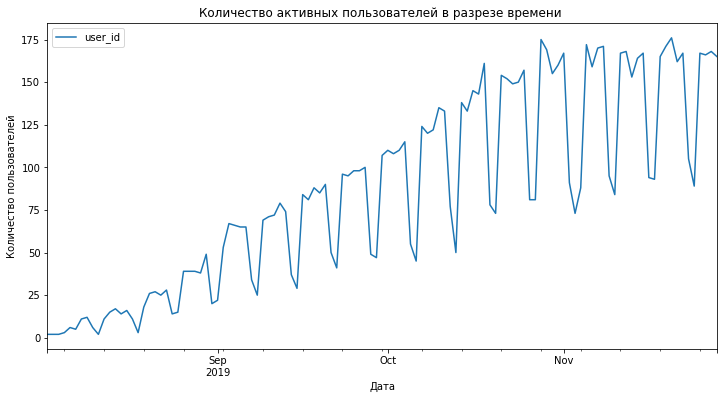

In [26]:
# посмотрим на количество пользователей, которые пользовались услугами, во времени
dau = dataset.groupby('date').agg({'user_id': 'nunique'}).reset_index()
dau.plot(figsize = (12,6), x = 'date',  y = 'user_id')
plt.title('Количество активных пользователей в разрезе времени ')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.show()

В датафрейме представлен период с 2019-08-02 по 2019-11-28, данные за ноябрь неполные, не хватает двух дней. Количество клиентов увеличивалось с августа по октябрь, к концу октября это значение стабилизировалось. В ноябре нет сильного роста или падения количество клиентов, также значения за этот месяц наиболее актуальные, поэтому пренебрежем отсутствием 2 дней в ноябре. Судя по ступенчатому виду графика, активность пользователей зависит от дня недели.

In [27]:
# активными будем считать пользователей, которые пользовались услугами связи в ноябре
active_users_list = dataset[(pd.to_datetime(dataset['date']).dt.month == 11)]['user_id']
display(f'Количество активных пользователей {active_users_list.nunique()},\
 их доля от всех пользователей {active_users_list.nunique()/dataset["user_id"].nunique() :.2f}')

'Количество активных пользователей 260, их доля от всех пользователей 0.85'

In [28]:
# добавляем номер месяца
dataset['month'] = dataset['date'].dt.month

# оставляем данные для активных пользователей
active_dataset = dataset.query('month == 11')
active_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month
438,166377,2019-11-01,out,False,880028,True,17,0,647,11
439,166377,2019-11-01,in,False,880028,False,3,134,156,11
440,166377,2019-11-01,out,False,880026,False,32,2487,2814,11
441,166377,2019-11-01,out,False,880026,True,15,0,410,11
442,166377,2019-11-01,out,False,880028,False,26,2487,2771,11


### Анализ затрат активных пользователей

Затраты активных пользователей складываются из платы за тариф, платы за операторов, исходящие внутренние вызовы, исходящие внешние вызовы. Для начала создадим датафрейм с информацией о стоимости услуг и присоединим его к датафремйу с информацией о клиентах.

In [29]:
# формируем датафрейм с информацией о стоимости услуг
costs = pd.DataFrame({'tariff_plan': ['A', 'B', 'C'], 
                     'tariff_cost': [4000, 2000, 1000],
                     'minute': [ 2000, 500, 0],
                     'internal_over_cost': [0.1, 0.15, 0.3], 
                     'external_cost': [0.3, 0.5, 0.7], 
                     'operator_cost': [50, 150, 300]})
costs
# присоединяем к client
clients = clients.merge(costs, on = 'tariff_plan', how = 'left')
clients.head()

,user_id,tariff_plan,date_start,tariff_cost,minute,internal_over_cost,external_cost,operator_cost
0,166713,A,2019-08-15,4000,2000,0.1,0.3,50
1,166901,A,2019-08-23,4000,2000,0.1,0.3,50
2,168527,A,2019-10-29,4000,2000,0.1,0.3,50
3,167097,A,2019-09-01,4000,2000,0.1,0.3,50
4,168193,A,2019-10-16,4000,2000,0.1,0.3,50


Создадим сводную таблицу с информацией о количестве операторов, количестве минут внешних и внутренних вызовов, c информацией о тарифе пользователя. Далее переведем секунды в минуты и округлим в большую сторону. На основе получившейся таблицы будем проводить расчеты трат пользователей за последний месяц.

In [30]:
# находим количество уникальных операторов в месяц
operator_in_month = (
    active_dataset.groupby('user_id')
    .agg({'operator_id':'nunique'})
    .reset_index()
    .rename(columns={'operator_id': 'count_operators'})
)

# исходящие внутренние звонки
internal = active_dataset.query('direction == "out" and internal == True')\
                       .groupby('user_id', as_index=False)['total_call_duration'].sum()
internal = internal.rename(columns={'total_call_duration': 'internal'})

external = active_dataset.query('direction == "out" and internal == False')\
                        .groupby('user_id', as_index=False)['total_call_duration'].sum()
external = external.rename(columns={'total_call_duration': 'external'})

# добавляем информацию о уникальных операторах и тарифах
active_user = (
    operator_in_month.merge(internal, on = 'user_id', how = 'outer')
    .merge(external, on = 'user_id', how = 'outer')
    .merge(clients, on = 'user_id', how = 'left')
    .drop('date_start', axis = 1)
)
active_user.head()

,user_id,count_operators,internal,external,tariff_plan,tariff_cost,minute,internal_over_cost,external_cost,operator_cost
0,166377,4,127.0,95384.0,B,2000,500,0.15,0.5,150
1,166391,1,NaN,NaN,C,1000,0,0.30,0.7,300
2,166392,2,NaN,NaN,C,1000,0,0.30,0.7,300
3,166405,8,115.0,406826.0,B,2000,500,0.15,0.5,150
4,166406,2,NaN,47294.0,B,2000,500,0.15,0.5,150


In [31]:
# пропуски обозначают отсутствие вызовов, заполним их нулями
active_user = active_user.fillna(0)

# переводим в минуты и округляем в большую сторону
active_user['internal'] = np.ceil(active_user['internal'] / 60)
active_user['external'] = np.ceil(active_user['external'] / 60)
active_user.head()

,user_id,count_operators,internal,external,tariff_plan,tariff_cost,minute,internal_over_cost,external_cost,operator_cost
0,166377,4,3.0,1590.0,B,2000,500,0.15,0.5,150
1,166391,1,0.0,0.0,C,1000,0,0.30,0.7,300
2,166392,2,0.0,0.0,C,1000,0,0.30,0.7,300
3,166405,8,2.0,6781.0,B,2000,500,0.15,0.5,150
4,166406,2,0.0,789.0,B,2000,500,0.15,0.5,150


In [32]:
# расчитаем траты пользователей за месяц
def cost_month(active_user, col_name):
    operator_cost = active_user['count_operators'] * active_user['operator_cost']
    internal_minute = (active_user['internal'] - active_user['minute']).apply(lambda x: 0 if x < 0 else x)
    internal_cost = internal_minute * active_user['internal_over_cost']
    external_cost = active_user['external'] * active_user['external_cost']
    active_user[col_name] = active_user['tariff_cost'] + operator_cost + internal_cost + external_cost
    return active_user

In [33]:
active_user = cost_month(active_user, 'total_cost')
active_user

,user_id,count_operators,internal,external,tariff_plan,tariff_cost,minute,internal_over_cost,external_cost,operator_cost,total_cost
0,166377,4,3.0,1590.0,B,2000,500,0.15,0.5,150,3395.0
1,166391,1,0.0,0.0,C,1000,0,0.30,0.7,300,1300.0
2,166392,2,0.0,0.0,C,1000,0,0.30,0.7,300,1600.0
3,166405,8,2.0,6781.0,B,2000,500,0.15,0.5,150,6590.5
4,166406,2,0.0,789.0,B,2000,500,0.15,0.5,150,2694.5
...,...,...,...,...,...,...,...,...,...,...,...
255,168583,2,0.0,0.0,B,2000,500,0.15,0.5,150,2300.0
256,168598,1,0.0,0.0,C,1000,0,0.30,0.7,300,1300.0
257,168601,2,0.0,554.0,C,1000,0,0.30,0.7,300,1987.8
258,168603,1,0.0,20.0,B,2000,500,0.15,0.5,150,2160.0


In [34]:
active_user_group = (
    active_user.groupby('tariff_plan')
    .agg({'count_operators':'mean', 'internal':'mean', 'external': 'mean'})
    .reset_index()
)
active_user_group

,tariff_plan,count_operators,internal,external
0,A,7.517241,126.310345,4209.586207
1,B,2.947917,16.770833,579.416667
2,C,2.074074,6.837037,415.281481


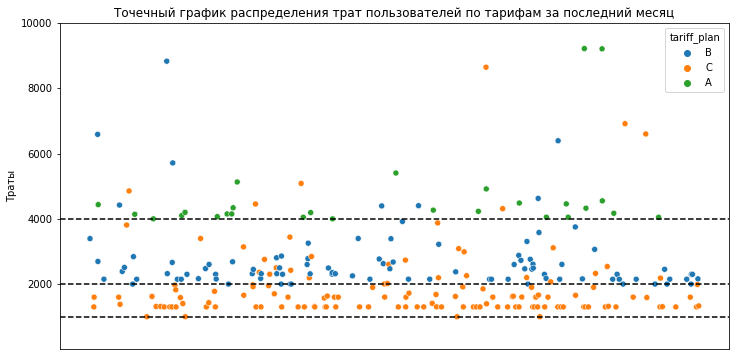

In [35]:
# посмотрим как распределены траты пользователей по тарифам
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(
    data = active_user, 
    x = 'user_id', 
    y = 'total_cost', 
    hue = 'tariff_plan'
)
ax.set_title('Точечный график распределения трат пользователей по тарифам за последний месяц')
ax.set_xlabel('')
ax.set_ylabel('Траты')
plt.ylim (1, 10000)
plt.axhline (y = 1000, color='black', linestyle='--')
plt.axhline (y = 2000, color='black', linestyle='--')
plt.axhline (y = 4000, color='black', linestyle='--')
ax.axes.xaxis.set_ticks([])
plt.show() 

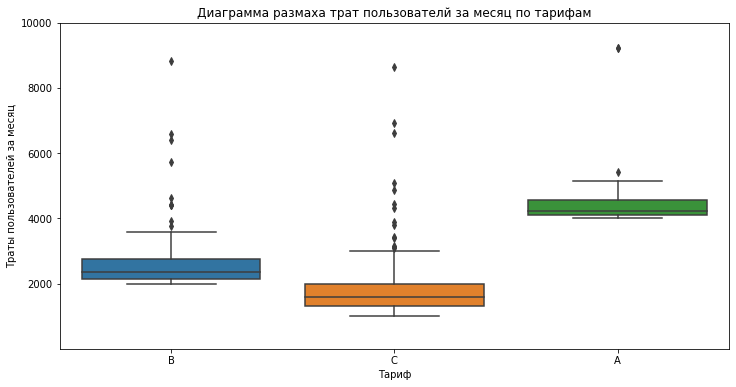

In [36]:
# построим диаграммы размаха
plt.figure(figsize = (12, 6))
sns.boxplot(data = active_user, x = 'tariff_plan', y = 'total_cost')
plt.ylim (1, 10000)
plt.title('Диаграмма размаха трат пользователй за месяц по тарифам')
plt.xlabel('Тариф')
plt.ylabel('Траты пользователей за месяц')
plt.show()

Медианное значение для тарифа C примерно 1600, для тарифа B - 2400, для тарифа A – 4300. Для всех тарифов присутствуют выбросы.

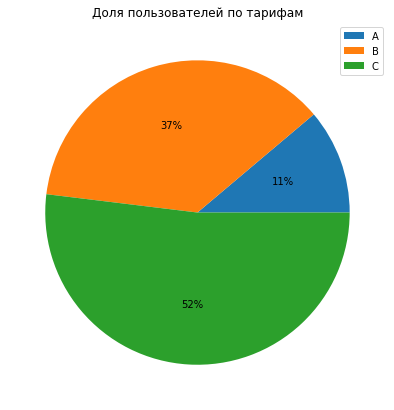

In [37]:
# доля пользователей по тарифам
users_by_tariffs = (
    active_user.groupby('tariff_plan')
    .agg({'user_id':'count'})
    .reset_index()
)
plt.figure(figsize = (7, 7))
plt.pie(users_by_tariffs['user_id'], autopct='%.0f%%')
plt.title('Доля пользователей по тарифам')
plt.legend(labels = users_by_tariffs['tariff_plan'],  loc='upper right')
plt.show()

У половины пользователей тариф C, на втором месте по количеству пользователей тариф B, самая маленькая доля пользователей у тарифа A.

In [38]:
perce = np.percentile(active_user['total_cost'], [90, 95, 99])
total_cost = active_user['total_cost'].sum()
display(f'90% пользователей платят в месяц меньше {perce[0]:.2f}, 95% – меньше {perce[1]:.2f}, \
99% – меньше {perce[2]:.2f}')
display(f'Общая выручка со всех клиентов за месяц: {total_cost}')

'90% пользователей платят в месяц меньше 4327.75, 95% – меньше 5088.54, 99% – меньше 9215.54'

'Общая выручка со всех клиентов за месяц: 684330.25'

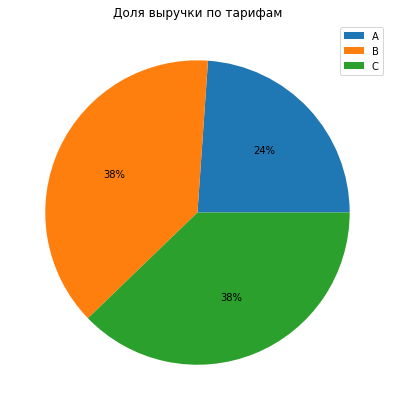

In [39]:
# доля выручки по тарифам
revenue_by_tariffs = (
    active_user.groupby('tariff_plan')
    .agg({'total_cost':'sum'})
    .reset_index()
)
plt.figure(figsize = (7, 7))
plt.pie(revenue_by_tariffs['total_cost'], autopct='%.0f%%')
plt.title('Доля выручки по тарифам')
plt.legend(labels = revenue_by_tariffs['tariff_plan'], loc='upper right')
plt.show()

Тарифы B и C приносят большую часть выручки, каждый по 38%, далее идет тариф A с 24%.

### Поиск пользователей с неоптимальными тарифами

In [40]:
# создадим пустой датафрейм и список тарифов
tariff_dataframe = []
tariff_name = ['A', 'B', 'C']

# для каждого тарифа делаем копию датафрейма
for tariff in range(len(tariff_name)):
    tariff_dataframe.append(active_user[['user_id', 'count_operators', 'internal', 'external']].copy())

# расчитываем месячную плату по каждому тарифу
for tariff in range(len(tariff_name)):
    data = tariff_dataframe[tariff]
    data['tariff_plan'] = tariff_name[tariff]
    data = data.merge(costs, on='tariff_plan')
    col_name = 'total_cost' + '_' + tariff_name[tariff]
    cost_month(data, col_name)
    data = data[['user_id', col_name]]
    tariff_dataframe[tariff] = data
    
active_user_by_tariff = active_user[['user_id', 'count_operators', 'internal',
                                      'external', 'tariff_plan', 'total_cost']].copy()

# создаем датафрейм, в котором указаны траты за все тарифы
for tariff in range(len(tariff_dataframe)):
    active_user_by_tariff = active_user_by_tariff.merge(tariff_dataframe[tariff], on='user_id')
    
active_user_by_tariff.head()

,user_id,count_operators,internal,external,tariff_plan,total_cost,total_cost_A,total_cost_B,total_cost_C
0,166377,4,3.0,1590.0,B,3395.0,4677.0,3395.0,3313.9
1,166391,1,0.0,0.0,C,1300.0,4050.0,2150.0,1300.0
2,166392,2,0.0,0.0,C,1600.0,4100.0,2300.0,1600.0
3,166405,8,2.0,6781.0,B,6590.5,6434.3,6590.5,8147.3
4,166406,2,0.0,789.0,B,2694.5,4336.7,2694.5,2152.3


In [41]:
# функция для определения самого выгодного для пользователя тарифа
def best_tariff(row):
    tariff_name = ['A', 'B', 'C']
    tariff_costs = []
    for i in range(len(tariff_name)):
        col_name = 'total_cost' + '_' + tariff_name[i]
        tariff_costs.append(row[col_name])
    best_tariff_cost = min(tariff_costs)
    for i in range(len(tariff_costs)):
        if best_tariff_cost == tariff_costs[i]:
            return tariff_name[i]
# функция для определения платы за самый выгодный для пользователя тариф
def best_tariff_cost(row):
    tariff_name = ['A', 'B', 'C']
    tariff_costs = []
    for i in range(len(tariff_name)):
        col_name = 'total_cost' + '_' + tariff_name[i]
        tariff_costs.append(row[col_name])
    best_tariff_cost = min(tariff_costs)
    return best_tariff_cost

In [42]:
# добавляем название самого выгодного для пользователя тарифа, его стоимость и процент перелат
active_user_by_tariff['best_tariff'] = active_user_by_tariff.apply(best_tariff, axis=1)
active_user_by_tariff['best_tariff_cost'] = active_user_by_tariff.apply(best_tariff_cost, axis=1)
active_user_by_tariff['difference'] = (active_user_by_tariff['total_cost'] \
- active_user_by_tariff['best_tariff_cost'])
active_user_by_tariff['difference_percent'] = round((active_user_by_tariff['total_cost'] \
- active_user_by_tariff['best_tariff_cost'])/active_user_by_tariff['total_cost'], 2)
active_user_by_tariff.head(5)

,user_id,count_operators,internal,external,tariff_plan,total_cost,total_cost_A,total_cost_B,total_cost_C,best_tariff,best_tariff_cost,difference,difference_percent
0,166377,4,3.0,1590.0,B,3395.0,4677.0,3395.0,3313.9,C,3313.9,81.1,0.02
1,166391,1,0.0,0.0,C,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0,0.00
2,166392,2,0.0,0.0,C,1600.0,4100.0,2300.0,1600.0,C,1600.0,0.0,0.00
3,166405,8,2.0,6781.0,B,6590.5,6434.3,6590.5,8147.3,A,6434.3,156.2,0.02
4,166406,2,0.0,789.0,B,2694.5,4336.7,2694.5,2152.3,C,2152.3,542.2,0.20


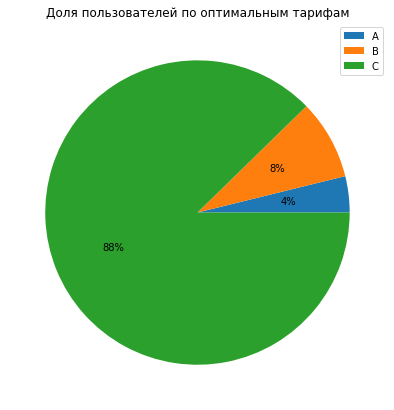

In [43]:
# доля пользователей по оптимальных тарифам
best_tariff_group = (
    active_user_by_tariff.groupby('best_tariff')
    .agg({'user_id':'count'})
    .reset_index()
)
plt.figure(figsize = (7, 7))
plt.pie(best_tariff_group['user_id'], autopct='%.0f%%')
plt.title('Доля пользователей по оптимальным тарифам')
plt.legend(labels = best_tariff_group['best_tariff'], loc='upper right')
plt.show()

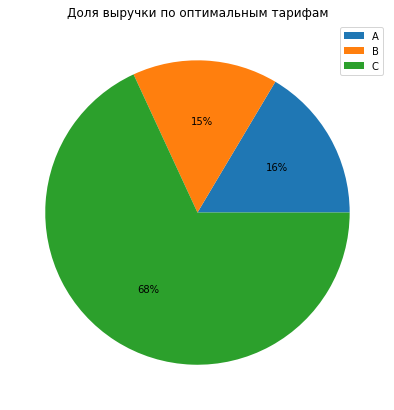

In [44]:
# выручка по оптимальным тарифам
revenue_by_best_tariffs = (
    active_user_by_tariff.groupby('best_tariff')
    .agg({'best_tariff_cost':'sum'})
    .reset_index()
)
plt.figure(figsize = (7, 7))
plt.pie(revenue_by_best_tariffs['best_tariff_cost'], autopct='%.0f%%')
plt.title('Доля выручки по оптимальным тарифам')
plt.legend(labels = revenue_by_best_tariffs['best_tariff'], loc='upper right')
plt.show()

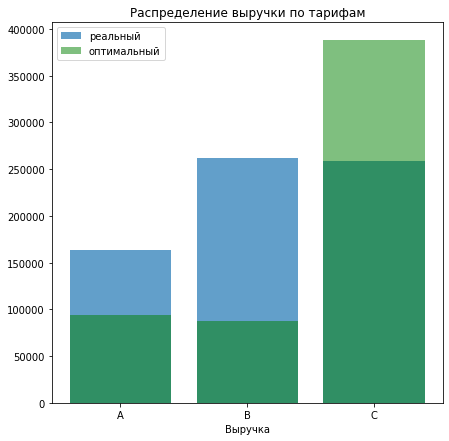

In [45]:
fig, ax = plt.subplots(figsize = (7,7))
ax.bar(revenue_by_tariffs['tariff_plan'], revenue_by_tariffs['total_cost'], alpha = 0.7, label = 'реальный')
ax.bar(revenue_by_best_tariffs['best_tariff'], revenue_by_best_tariffs['best_tariff_cost']\
       , color = 'green', alpha=0.5, label = 'оптимальный')
ax.set_xlabel('Тариф')
ax.set_xlabel('Выручка')
ax.set_title('Распределение выручки по тарифам')
ax.legend()
plt.show()

In [46]:
# доля переплачивающих клиентов
round(len(active_user_by_tariff.query('difference > 0'))/len(active_user_by_tariff), 2)

0.47

In [47]:
best_tariff_cost = active_user_by_tariff['best_tariff_cost'].sum()
loss_percent = ((total_cost - best_tariff_cost)/total_cost) * 100
display(f'Общая выручка со всех клиентов за месяц: {total_cost}')
display(f'Общая выручка с клиентов за месяц, если клиенты будут платить по самому выгодному для них тарифу: \
{best_tariff_cost}')
display(f'Разница между выручками: {total_cost - best_tariff_cost :.2f}')
display(f'Процент потерь в выручке, если все клиенты перейдут на выгодные для них тарифы {loss_percent :.2f}%')

'Общая выручка со всех клиентов за месяц: 684330.25'

'Общая выручка с клиентов за месяц, если клиенты будут платить по самому выгодному для них тарифу: 569351.85'

'Разница между выручками: 114978.40'

'Процент потерь в выручке, если все клиенты перейдут на выгодные для них тарифы 16.80%'

In [48]:
# посмотрим на распределение самых выгодных тарифов для пользователей тарифа C
tariff_C = active_user_by_tariff[active_user_by_tariff['tariff_plan'] == 'C']\
[['user_id','tariff_plan', 'total_cost', 'best_tariff', 'best_tariff_cost','difference', 'difference_percent']]
tariff_C_group = tariff_C.groupby('best_tariff').agg({'user_id':'count'}).reset_index()
tariff_C_group['percent'] = round(tariff_C_group['user_id']/len(tariff_C), 2)
tariff_C_group.style.set_caption('Распределение выгодных тарифов для пользователей тарифа C')

,best_tariff,user_id,percent
0,A,1,0.010000
1,B,10,0.070000
2,C,124,0.920000


Для 92% пользователей тарифа C, он является оптимальным, для 1% наиболее выгодным был бы тариф A, еще для 7% был бы выгоден тариф B.

In [49]:
# пользователи тарифа C, которым можно предложить более дорогой тариф
upper_C = tariff_C.query('best_tariff == "A" or best_tariff == "B"')
upper_C

,user_id,tariff_plan,total_cost,best_tariff,best_tariff_cost,difference,difference_percent
13,166520,C,4855.2,B,4110.0,745.2,0.15
58,166939,C,3139.7,B,3071.5,68.2,0.02
64,166983,C,4455.2,B,4201.0,254.2,0.06
83,167109,C,3440.6,B,3250.0,190.6,0.06
88,167150,C,5086.3,B,4422.5,663.8,0.13
144,167650,C,3874.7,B,3796.0,78.7,0.02
161,167827,C,8648.7,A,7042.3,1606.4,0.19
168,167888,C,4312.2,B,4173.0,139.2,0.03
205,168073,C,3112.2,B,3057.0,55.2,0.02
236,168336,C,6918.4,B,5381.0,1537.4,0.22


In [50]:
# посчитаем разницу в выручке для пользователей, которым выгодно с тарифа C перейти на тарифы A или B
loss_upper_C = round(upper_C['difference'].sum(), 2)
loss_upper_C

6518.4

In [51]:
# посмотрим на распределение самых выгодных тарифов для пользователей тарифа B
tariff_B = active_user_by_tariff[active_user_by_tariff['tariff_plan'] == 'B']\
[['user_id','tariff_plan', 'total_cost', 'best_tariff', 'best_tariff_cost','difference', 'difference_percent']]
tariff_B_group = tariff_B.groupby('best_tariff').agg({'user_id':'count'}).reset_index()
tariff_B_group['percent'] = round(tariff_B_group['user_id']/len(tariff_B), 2)
tariff_B_group.style.set_caption('Распределение выгодных тарифов для пользователей тарифа B')

,best_tariff,user_id,percent
0,A,4,0.040000
1,B,8,0.080000
2,C,84,0.880000


Только для 8% пользователей тарифа B тариф является оптимальным, для 4% пользователей более выгодным будет тариф A, 88% пользователей выгоднее будет перейти на самый недорогой тариф.

In [52]:
# пользователи тарифа B, которым можно предложить более дорогой тариф
upper_B = tariff_B.query('best_tariff == "A"')
upper_B

,user_id,tariff_plan,total_cost,best_tariff,best_tariff_cost,difference,difference_percent
3,166405,B,6590.50,A,6434.3,156.20,0.02
24,166658,B,8833.50,A,7500.1,1333.40,0.15
29,166680,B,5714.50,A,5708.7,5.80,0.00
207,168091,B,6393.85,A,5982.0,411.85,0.06


In [53]:
# посчитаем разницу в выручке для пользователей, которым выгодно с тарифа B перейти на тариф A
loss_upper_B = round(upper_B['difference'].sum(), 2)
loss_upper_B

1907.25

In [54]:
# посмотрим на распределение самых выгодных тарифов для пользователей тарифа A
tariff_A = active_user_by_tariff[active_user_by_tariff['tariff_plan'] == 'A']\
[['user_id','tariff_plan', 'total_cost', 'best_tariff', 'best_tariff_cost', 'difference', 'difference_percent']]
tariff_A_group = tariff_A.groupby('best_tariff').agg({'user_id':'count'}).reset_index()
tariff_A_group['percent'] = round(tariff_A_group['user_id']/len(tariff_A), 2)
tariff_A_group.style.set_caption('Распределение выгодных тарифов для пользователей тарифа A')

,best_tariff,user_id,percent
0,A,5,0.170000
1,B,4,0.140000
2,C,20,0.690000


Тариф A является самым выгодным только для 17% своих пользователей, 14% было бы выгодно перейти на тариф B, а еще 69% перейти на тариф C.

In [55]:
# посчитаем убытки, если пользователи перейдут на более выгодные дорогие тарифы
loss_upper_tariff = loss_upper_B + loss_upper_C
display(f'Потери в выручке, если клиенты перейдут на более дорогие, но выгодные для них тарифы {loss_upper_tariff}')
display(f'Процент потерь в выручке, если клиенты перейдут на более дорогие, но выгодные для них тарифы \
{(loss_upper_tariff/total_cost)*100 :.2f}%')

'Потери в выручке, если клиенты перейдут на более дорогие, но выгодные для них тарифы 8425.65'

'Процент потерь в выручке, если клиенты перейдут на более дорогие, но выгодные для них тарифы 1.23%'

In [56]:
# создадим один датафрейм с пользователями, которым нужно предложить повышение тарифа
upper_tariff = upper_C.append(upper_B, ignore_index = True)
upper_tariff

,user_id,tariff_plan,total_cost,best_tariff,best_tariff_cost,difference,difference_percent
0,166520,C,4855.20,B,4110.0,745.20,0.15
1,166939,C,3139.70,B,3071.5,68.20,0.02
2,166983,C,4455.20,B,4201.0,254.20,0.06
3,167109,C,3440.60,B,3250.0,190.60,0.06
4,167150,C,5086.30,B,4422.5,663.80,0.13
5,167650,C,3874.70,B,3796.0,78.70,0.02
6,167827,C,8648.70,A,7042.3,1606.40,0.19
7,167888,C,4312.20,B,4173.0,139.20,0.03
8,168073,C,3112.20,B,3057.0,55.20,0.02
9,168336,C,6918.40,B,5381.0,1537.40,0.22


### Выводы по разделу
- Для проведения исследовательского анализа были выбраны клиенты, которые пользовались услугами за последний месяц;
- для активных пользователей были посчитаны траты за месяц. Медианное значение для тарифа C составило примерно 1600, для тарифа B - 2400, для тарифа A – 4300, на всех тарифах присутствуют пользователи, которые платят сильно больше остальных;
- больше половины всех пользователей используют тариф C (52%), на втором месте по количеству пользователей тариф B (37%), самая маленькая доля пользователей у тарифа A (11%);
- тарифы B и C приносят большую часть выручки, каждый по 38%, далее идет тариф A с 24%;
- 47% пользователей переплачивают на текущем тарифе;
- большая часть пользователей платила бы меньше, если бы использовала тариф C, но тогда потери по выручке составили больше 16%;
- если предложить пользователям смену тарифа только в большую сторону, то потери составят чуть больше 1%.

## Проверка статистических гипотез

### Цена услуг тарифов A и B

Проверим различается ли цена услуг на тарифных планах A и B. Сформируем гипотезы:

**H0: Цена услуг на тарифных планах A и B не различается**

**H1: Цена услуг различается на тарифных планах A и B**

Для проверки гипотез будем использовать критерий Манна-Уитни.

In [57]:
# критический уровень статистической значимости
alpha = 0.05  
total_cost_A = tariff_A['total_cost']
total_cost_B = tariff_B['total_cost']
results = st.mannwhitneyu(total_cost_A, total_cost_B)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  1.123848264922355e-12
Отвергаем нулевую гипотезу: разница статистически значима


Разница между ценой услуг на тарифе A и B статистически значима, следовательно мы отвергаем нулевую гипотезу в пользу альтернативной.

In [58]:
display(f'Средний чек тарифа A {tariff_A["total_cost"].mean() :.2f}')
display(f'Средний чек тарифа B \
{tariff_B["total_cost"].mean() :.2f}')

'Средний чек тарифа A 5638.74'

'Средний чек тарифа B 2732.14'

### Различие выручки до и после смены тарифов  пользователей на оптимальные

Проверим будет ли статистически значимым измение выручки, если всем клиентам предложить изменить тариф на оптимальный. Для этого сформируем гипотезы:

**H0: Выручки до и после смены тарифов не различаются**

**H1: Различия между выручками до и после смены тарифов есть**

Для проверки гипотез будем использовать критерий Манна-Уитни.

In [59]:
# критический уровень статистической значимости
alpha = 0.05  
revenue_before = active_user_by_tariff['total_cost']
revenue_after = active_user_by_tariff['best_tariff_cost']
results = st.mannwhitneyu(revenue_before, revenue_after)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  2.71581407555702e-07
Отвергаем нулевую гипотезу: разница статистически значима


In [60]:
display(f'Средний чек до смены тарифов пользователей {active_user_by_tariff["total_cost"].mean() :.2f}')
display(f'Средний чек после смены тарифов пользователей на оптимальные \
{active_user_by_tariff["best_tariff_cost"].mean() :.2f}')

'Средний чек до смены тарифов пользователей 2632.04'

'Средний чек после смены тарифов пользователей на оптимальные 2189.81'

Разница между выручками до и после смены тарифов пользователей на оптимальные статистически значима, нулевая гипотеза была отвергнута. Перевод всех пользователей на оптимальные тарифы приведет к значимым потерям в выручке.

### Выводы по разделу
- Цены услуг на тарифных планах A и B различаются;
- разница между выручкой до и после смены всех тарифов пользователей на оптимальные статистически значима.

## Общий вывод

Во время обзора данных были обнаружены пропуски в столбцах internal (1%), operator_id (15%). Пропуски в operator_id относятся к пропущенным звонкам, следует уделить этому внимание при сборе данных. Также во время предобрабтки были обнаружены аномалии с длительностью звонков. Стоит обратить внимание на пользователя с user_id 166582 и операторов, которые работали с этим пользователем [885876, 885890, 925922], и разобраться в причинах длительности разговоров более 24 часов в сутки.

Данные для анализа были представлены за период с 2019-08-02 по 2019-11-28, количество клиентов увеличивалось с августа по конец октября, к ноябрю значения стабилизовались. Основные расчеты были проведены для пользователей, которые пользовались услугами в ноябре. Сформирована таблица active_user с тратами пользователей за месяц. Медианное значение трат для тарифа C примерно 1600, для тарифа B - 2400, для тарифа A – 4300, на всех тарифах присутствуют пользователи, которые платят сильно больше остальных. 

Самый популярный тариф C, им пользуется 52% пользователей, далее идет тариф B с 37% и тариф A с 11%. Тарифы B и C приносят большую часть выручки, каждый по 38%, тариф A приносит 24%. Во время работы был создан датафрейм active_user_by_tariff, с расчетами самых выгодных для пользователей тарифов. Было выяснено, что 47% пользователей переплачивают на текущем тарифе, наиболее выгодный тариф для пользователей – C. Eсли все пользователи перейдут на самый выгодный для них тариф,  разница в выручке до и после смены окажется статистически значима и составит более 16%, средняя оплата снизится с 2632 до 2190. Переход всех пользователей на оптимальные тарифы повысит их лояльность, но приведет к большим потерям в выручке, поэтому рекомендую предложить пользователям смену тарифа только в большую сторону, при таком раскладе потери составят чуть больше 1%.